In [1]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv('./input/data.csv/data.csv')

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698


In [4]:
data.shape

(40455, 10)

In [5]:
#no nulls
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [7]:
data.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798385,61.747932,57.459085,5.732041,5.735939,3.539537,3939.242813
std,0.474353,1.432322,2.231152,1.123169,1.152802,0.709709,4000.344155
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2409.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5331.000000
max,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,18823.000000


In [8]:
correlation_matrix = data.corr()
correlation_matrix

,carat,depth,table,x,y,z,price
carat,1.000000,0.024370,0.180861,0.975010,0.944669,0.948835,0.921898
depth,0.024370,1.000000,-0.296418,-0.028645,-0.032708,0.090617,-0.014383
table,0.180861,-0.296418,1.000000,0.195254,0.181997,0.149342,0.125521
x,0.975010,-0.028645,0.195254,1.000000,0.967161,0.966188,0.884500
y,0.944669,-0.032708,0.181997,0.967161,1.000000,0.941816,0.859138
z,0.948835,0.090617,0.149342,0.966188,0.941816,1.000000,0.857643
price,0.921898,-0.014383,0.125521,0.884500,0.859138,0.857643,1.000000


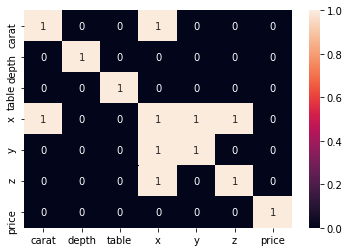

In [9]:
#high correlation (carat,x,y,z,price)
ax = sns.heatmap(correlation_matrix>0.95, annot=True)

In [10]:
data.color.value_counts()

G    8492
E    7343
F    7183
H    6230
D    5046
I    4046
J    2115
Name: color, dtype: int64

In [11]:
#reduce categories?¿
data.cut.value_counts()

Ideal        16139
Premium      10377
Very Good     9101
Good          3650
Fair          1188
Name: cut, dtype: int64

In [12]:
#https://www.bluenile.com/es/education/diamonds/clarity
data.clarity.value_counts()

SI1     9767
VS2     9147
SI2     6909
VS1     6157
VVS2    3822
VVS1    2740
IF      1356
I1       557
Name: clarity, dtype: int64

In [14]:
steps = [
    
    StandardScaler(),
    Normalizer(),
    PCA(n_components=3)
]

pipe = make_pipeline(*steps)


In [22]:
data_dummied = pd.get_dummies(data)
data_dummied

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.26,61.9,57.0,8.44,8.36,5.20,12831,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2.43,63.2,57.0,8.56,8.50,5.39,16170,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.80,61.0,57.0,6.03,6.01,3.67,2797,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.40,63.3,60.0,4.68,4.64,2.95,630,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0.31,61.6,55.0,4.39,4.37,2.70,698,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,1.11,62.8,61.0,6.63,6.56,4.14,5315,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40451,0.73,62.6,56.0,5.77,5.74,3.60,2762,0,0,1,...,0,0,0,0,0,0,0,1,0,0
40452,1.26,59.2,60.0,7.09,7.02,4.18,6855,0,0,0,...,1,0,0,0,0,0,1,0,0,0
40453,0.72,61.4,56.0,5.76,5.83,3.56,2297,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [23]:
pipe = make_pipeline(*steps)
X_feats = pipe.fit_transform(data_dummied)

In [ ]:
y = data_